## Project: Bank Analysis - Tweets 
Using Twint to scrape tweets 

Use beautiful soup to clean tweets with WordPunctTokenizer


# Quick Twint code
Github - https://github.com/twintproject/twint

All functions - https://github.com/twintproject/twint/wiki/Configuration
### setup 
c.twint.Config() 

#### set username
c.Username = "realDonaldTrump"

#### set phrase search
c.Search = "great"

#### customise output
c.Custom["tweet"] = ["id"]           --- assign column names

c.Custom["user"] = ["bio"]

c.Limit = 1                          ---- limit to batches (unknown size)

c.Since = "2019–04–29"

c.Until = "2020–04–29"

#### Pandas 
c.Pandas = True

    --------once run save to dataframe
    
    ---- Tweets 
    df = twint.storage.panda.Tweets_df
    
    ---- followers 
    df = twint.storage.panda.Follow_df
    
    df = Followers_df['followers'][username]

#### Write output 
c.Store_csv = True

c.Output = "test.csv"

### Execute determines how its run- using setup above
twint.run.Search(c)    --- will run search for all tweets with the above

twint.run.Profile(c)   ---- will run against profile - return only this profiles tweets

twint.run.Followers(c) ---- get follower info 


config.Since = "2019–04–29"\
config.Until = "2020–04–29"\
config.Store_json = True


In [282]:

import twint
import pandas as pd
import nest_asyncio
nest_asyncio.apply()            #for compatibility issues 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import seaborn as sns

#cleaning
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer

# NLP
from textblob import TextBlob
#from IPython.display import Markdown, display

#word cloud and stopwords
from wordcloud import WordCloud, STOPWORDS

### Configure and run Twint (twitter scrapper)

In [6]:
c = twint.Config()
bankString = "StandardBankZA OR \"Standard Bank\""
c.Search = bankString

c.Pandas = True

## timeframe
c.Since = "2021-05-27"
#c.Until = "2021-07-30"

In [7]:
%%time
#run Search 
twint.run.Search(c)

1428024276121227270 2021-08-18 18:01:33 +0200 <business_see> Standard Bank, Nedbank and Grey Advertising support Unicef to assist KZN and Gauteng communities  https://t.co/hn17RkcW05
1428024263647313920 2021-08-18 18:01:30 +0200 <DataDotcoaza> Standard Bank, Nedbank and Grey Advertising support Unicef to assist KZN and Gauteng communities  https://t.co/iXGubk4BAG
1428024028057440264 2021-08-18 18:00:34 +0200 <saprepaidcard> Standard Bank Gift Card is a Non-Reloadable Mastercard and Visa - This is goldmine of info #prepaidcreditcard  https://t.co/BiTyeTBPgO
1428023390242287620 2021-08-18 17:58:02 +0200 <iMambaZN> Dear @StandardBankZA  im expecting my monies the government is owing me. Please let me know by sms when they've deposited them.  https://t.co/C93YpjSHRZ
1428023100642316292 2021-08-18 17:56:53 +0200 <EmmsWaRakau> The worst thing happened today @Makro_SA .Trans declined on their s.point but went through on my acc. Now,I wouldn't be worried but after what @Karabo_Mokgoko said + t

1427968199975395332 2021-08-18 14:18:43 +0200 <d3cdupreez> Why does @StandardBankZA hate its customers so?
1427965478392193030 2021-08-18 14:07:55 +0200 <Truebz> I dont want to be nasty. But my experience with @StandardBankZA proves why I prefer @CapitecBankSA. I'm waiting in a queue for a basic service that would otherwise have lasted me no more than 5mins at Capitec. Banking should really become simpler and more efficient.
1427962601099640836 2021-08-18 13:56:29 +0200 <GiftEast> Donate to our Education Support Program:  Account Name: Gift of the Givers Foundation Account Number: 052278611 Bank: Standard Bank Branch: Pietermaritzburg Branch Code: 057525
1427962370740133896 2021-08-18 13:55:34 +0200 <RhandzuOptimus> @NgobeniIke @FNBSA @StandardBankZA Excuses is their speciality, it took them 8 weeks to adjust  my account.
1427961816932565003 2021-08-18 13:53:22 +0200 <Social1Tv> Standard Bank Polokwane Library Gardens opens its doors to public for seamless access.For the full story.vis

1427935349637095424 2021-08-18 12:08:11 +0200 <Bhekala1> Call Center Agent Always On - Standard Bank - Gauteng  https://t.co/2HXUw1TqvW #joblinks #jobs
1427933892120616960 2021-08-18 12:02:24 +0200 <benedictkelly> @afairweather @Mpieters Just as soon as they activate the 5G chips we got for free with our vaccine.  Jokes aside, Apple Pay is like living in the future. Now if @StandardBankZA could get their act together…
1427933619813769220 2021-08-18 12:01:19 +0200 <AucorAuction> Aucor Nationwide is hosting a Standard Bank Vehicle Asset Finance Webcast auction! Webcast bidding starts on Monday, 23 August at 10:30 Pre-webcast online bidding is available from 21 August at 09:00. Register &amp; Bid  https://t.co/3vU4hevOho  https://t.co/p1Knf6MXHC
1427933175020408833 2021-08-18 11:59:33 +0200 <WizzyMabundox> @StandardBankZA HIi Admin. I have called, emailed for days. It has come to this. Your Teams Service is poor. You do not care about your customer base. Please channel your careless attit

1427901832676978691 2021-08-18 09:55:00 +0200 <Servest_SA> We are proud to partner with @SBTopWomen for the @StandardBankZA Top Women Virtual Conference.  https://t.co/0qoASIx4Uz #SBTopWomen
1427901118219227136 2021-08-18 09:52:10 +0200 <Bamburi> @StandardBankZA Atrocious service from #standardbank. Did you know it takes 7 days to redeem #UCount rewards into a new PureSave account? Neither did I. Did you know that when you give the call centre your physical address including post code, they ask you where that is? Asleep at the wheel OK
1427900331028008961 2021-08-18 09:49:02 +0200 <Bamburi> @StandardBankZA Yes. If you search really hard you can find it. But... Do you see there it says 'Tell me more'. I don't want to be told about it. I want a direct means of making a redemption into the account. Clunky website design.
1427899934657875968 2021-08-18 09:47:28 +0200 <MthokozisiZulu> You can still catch our Standard Bank Ovation Awarded production @StandardBankArt of ‘FED’ as part of the N

1427850763821326338 2021-08-18 06:32:04 +0200 <Ntsikel48676328> @StandardBankZA @KennaKelebogile It works for few seconds then go back the same problem again
1427848232080711684 2021-08-18 06:22:01 +0200 <AneleAndTheClub> You’re tuned into #Zwelisani the dynamic duo, @TheZweli &amp; @HulisaniRavele   Plenty of music to get you ready for the day ahead! ￼ Coming up next:   R10,000 Pop Quiz with @StandardBankZA   ￼#MoneyMinute with @ArabileG #ClassicOrNot   ￼ https://t.co/0OMePxLqxo  #947Joburg  https://t.co/lR8axOgpGh
1427847395644219394 2021-08-18 06:18:41 +0200 <ntando_rajiv> I hate standard bank, their service is so appalling! Fuck they make me sick 🤢🤮
1427846343003938817 2021-08-18 06:14:30 +0200 <Tsontsa_G> @_K_Matlou @StandardBankZA Ya Nedbank is 30 minutes....so annoying
1427843718208438273 2021-08-18 06:04:05 +0200 <947> It's time for the dynamic duo, @TheZweli &amp; @HulisaniRavele on #ZweliSaniOn947 Plenty of music to get you up and ready for the day ahead!💪🏽  ⛅️ R10,000 Pop Qu

1427674029117300746 2021-08-17 18:49:48 +0200 <paulinasekgolo1> @StandardBankZA @PhenRachidy #PureSave #FamilyFeudSA #Standardbank #ItCanBe  https://t.co/uLskFdB3dJ
1427673185634377734 2021-08-17 18:46:26 +0200 <daddychengson> What a smart way of getting rewarded for using your standard bank cards to transact#UCount
1427671563701088259 2021-08-17 18:40:00 +0200 <JanineClimate> @FFF_SAJ @annalise_davis @ClimateHuman @parents4future @BillNye @iamjohnoliver @GretaThunberg @BLM_TO @RavynWngz @StandardBankZA @StanChart @Earthlife_JHB @friends @antonioguterres @KevinClimate @ClimatePsych @ThieSabine If we use Citizen assembly, then  'No more Climate political Heros!'.   https://t.co/pdYr6FsG3T
1427671464472420355 2021-08-17 18:39:36 +0200 <LolwethuGubu> @StandardBankZA #ItCanBe
1427669650188427272 2021-08-17 18:32:24 +0200 <_mackmogale> @kgadi_ZA @_K_Matlou @StandardBankZA With whose money??
1427669480625295362 2021-08-17 18:31:43 +0200 <kgadi_ZA> @_mackmogale @_K_Matlou @StandardBankZA The 

1427610975654514699 2021-08-17 14:39:14 +0200 <Bafanaisaac1> @StandardBankZA  #SBFamily #PureSave #familyfeudsa #StandarBank #ItCanBe  https://t.co/mceTNruG1l
1427610706527072258 2021-08-17 14:38:10 +0200 <Ruthayzia_23> @947 @StandardBankZA Entered
1427610404813950976 2021-08-17 14:36:58 +0200 <Bhekala1> Feature Analyst - Standard Bank - Gauteng  https://t.co/6REB8nx1qq #resume #joblinks
1427608230973394945 2021-08-17 14:28:20 +0200 <ClaireOwgan> @StandardBankZA Guess what? Telemarketers are still at it! This is the 13th call in just over 2 weeks.  https://t.co/cTp2TgJrGF
1427607397389029400 2021-08-17 14:25:01 +0200 <TBredenhand> @StandardBankZA #SBFamily #PureSave #ItCanBe #FamilyFeudSA #StandardBank  https://t.co/AKTvqj9Z4D
1427605127163269126 2021-08-17 14:16:00 +0200 <_PabZie_> @StandardBankZA Ok.
1427603076085698595 2021-08-17 14:07:51 +0200 <_K_Matlou> @StandardBankZA I sent money more than an hour ago to a different bank, and no it's not a new beneficiary... Why do I pay a fee 

1427556204910362625 2021-08-17 11:01:36 +0200 <NcamaneNtara> @InshallahAmeena @FNBSA @StandardBankZA You guys must come to @FNBSA they have been so good to me  https://t.co/YehrSZYe2h
1427555866845274113 2021-08-17 11:00:16 +0200 <Tr0llingmachine> @StandardBankZA  Not able to view pending Debi checks on my app.  How can we fix this?
1427554700287688705 2021-08-17 10:55:37 +0200 <NephiphidiMercy> @StandardBankZA @FeudAfrica 💙💙💙
1427554019514462216 2021-08-17 10:52:55 +0200 <MorwaMasekana> @EFFSouthAfrica Last year i filled the form and made a payment at Standard bank. Even today I haven't received the membership card. - KZN Pietermaritzburg
1427553173640785941 2021-08-17 10:49:33 +0200 <_PabZie_> @StandardBankZA I’ve had a call with 2 consultants on changing my banker but clearing this is falling on deaf ears.
1427552128462098433 2021-08-17 10:45:24 +0200 <Theresa49540330> @StandardBankZA @FeudAfrica Congratulations
1427550051941892097 2021-08-17 10:37:09 +0200 <Shirley66142113> @Standa

1427516631840960534 2021-08-17 08:24:21 +0200 <Ikgopoleng_> @StandardBankZA Thanks team😊 #SBFamily #PureSave #ItCanBe
1427515717969227789 2021-08-17 08:20:43 +0200 <deaz_man> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/q1AgFRvAQc
1427514957990703127 2021-08-17 08:17:42 +0200 <KennaKelebogile> @StandardBankZA Please check DM
1427514255608360978 2021-08-17 08:14:55 +0200 <LihleNature> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/OV8K7j0NVp
1427513784890011649 2021-08-17 08:13:02 +0200 <FatsoTlhogonolo> @StandardBankZA 😊 thank you fam #ItCanBe #PureSave
1427513448544579594 2021-08-17 08:11:42 +0200 <kingM_Blaze> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/8enjX2mKOi
1427513403485171715 2021-08-17 08:11:31 +0200 <EricaIsaacs2> @StandardBankZA @FeudAfrica #ItCanBe 💙
1427512159953727494 2021-08-17 08:06:35 +0200 <Bhekala1> Feature Analyst - Standard Bank - Gauteng  

1427380254423846916 2021-08-16 23:22:26 +0200 <BrandonMusiq> Standard Bank: you have R100 available, but we feel like its R500, so now we charging you R300 for spending imaginary money and going over the R100 we eventually figured out.  https://t.co/Tg5K5cIM7p
1427374849417166853 2021-08-16 23:00:58 +0200 <victormlazi> @StandardBankZA #PureSave  https://t.co/Nw1HPt0WzF
1427374587533221891 2021-08-16 22:59:55 +0200 <mpumet> @StandardBankZA Huawei
1427374168346091523 2021-08-16 22:58:15 +0200 <victormlazi> @StandardBankZA #PureSave  https://t.co/LySGhaAndw
1427374047990583301 2021-08-16 22:57:47 +0200 <SobchakAnatoly> @LedwabaTeboho @_Mashudu_M " ...sale banroma somewhere..."👈 Away bolela ka checking 😂😂😂 but is fine.  Visitor 🗣️ mmata ne kesa nyake o botxa, ke tshweri ngwana o mongwe o bereka daa standard bank, I have to see her today 😂  https://t.co/kdYlK6S5PM
1427373534226038784 2021-08-16 22:55:44 +0200 <kg_blaq> @floyd_mph I remember standard bank 🤣🤣  https://t.co/mLv7OVVqn1
14273728

1427323170395148294 2021-08-16 19:35:36 +0200 <avissmakhubs> @StandardBankZA @AnnahSesiMaria1 #PureSave  #StandardBank #FamilyFeudSA #ItCanBe #SBFamily  https://t.co/vlh2tvKT8N
1427322132976054280 2021-08-16 19:31:29 +0200 <Zamahlobo7> @StandardBankZA @FeudAfrica Congratulations
1427321981167357958 2021-08-16 19:30:53 +0200 <Lyndacomps> @StandardBankZA @FeudAfrica Congratulations 🎉🎉🎉💃💃💃
1427321882114732032 2021-08-16 19:30:29 +0200 <Mkhathini_03> @StandardBankZA @FeudAfrica 💙 #ItCanBe #FamilyFeudAfrica
1427321462784991234 2021-08-16 19:28:49 +0200 <RudianC> @StandardBankZA Yes it logs out by itself or just totally doesn't work since the update last week. I've tried the whole "HMS Core" update on my huawei which you told me to do but ni success. You prompted me to dm my personal info which i did to check whats wrong and yet no feedback.
1427321159264182280 2021-08-16 19:27:37 +0200 <MotivationZA> @StandardBankZA @FeudAfrica 💙 #ItCanBe #FamilyFeudAfrica
1427319477708935168 2021-08-16 19:

1427304301089763334 2021-08-16 18:20:38 +0200 <Nthabeleng_Pooe> @StandardBankZA @FeudAfrica 🥳🥳
1427304080356122630 2021-08-16 18:19:45 +0200 <p_p97222304> @StandardBankZA #SBFamily #PureSave  https://t.co/YyZE6tnDxU
1427304037414838280 2021-08-16 18:19:35 +0200 <Lyndacomps> @StandardBankZA @SundayTimesZA Awesome congratulations 🎉🎉🎉
1427303886348595202 2021-08-16 18:18:59 +0200 <maduwapatrick> @StandardBankZA @FeudAfrica Congratulations
1427303767163211785 2021-08-16 18:18:30 +0200 <Sinky04920265> @StandardBankZA @FeudAfrica Congratulations
1427303621075640327 2021-08-16 18:17:55 +0200 <GRAM82> @StandardBankZA @FeudAfrica Congratulations 👌👌👌
1427303356964524035 2021-08-16 18:16:52 +0200 <OndeleDudula> @StandardBankZA @FeudAfrica You good to go 💙
1427302894198476807 2021-08-16 18:15:02 +0200 <GiftEast> Donate to our Education Support Program: Account Name: Gift of the Givers Foundation Account Number: 052278611 Bank: Standard Bank Branch: Pietermaritzburg Branch Code: 057525
142730269258

1427270338400948227 2021-08-16 16:05:40 +0200 <Siphe90974165> @StandardBankZA @SundayTimesZA @StandardBankZA  https://t.co/mpT6V0C1oN
1427270219253288966 2021-08-16 16:05:12 +0200 <Happiness22_021> @StandardBankZA Thank you 💙 #ItCanBe
1427269385631240195 2021-08-16 16:01:53 +0200 <OG_ELKAT> @nesbert_Kamo @CapitecBankSA Dude, standard bank is another pandemic when it comes to card change costs.  Decided I'd rather use Instant Money than replace my card
1427269262234767360 2021-08-16 16:01:24 +0200 <Crime_SpotterSA> WATCH : SHOOTING IN MUGRAVE  ⚠️1 person has been shot after being held up by 2 African male suspects near the kingsmead standard bank.  Undisclosed amount of cash taken. KZN VIP Medics have stabilized the victim and transported him to a private medical facility.  https://t.co/fEKrBPkca1
1427269149802303490 2021-08-16 16:00:57 +0200 <RudianC> @StandardBankZA any update on your problems with the banking app?
1427268923809013766 2021-08-16 16:00:03 +0200 <MaryRLedwaba> @Standard

1427243121302253568 2021-08-16 14:17:31 +0200 <Ruthayzia_23> @StandardBankZA #SBFamily #PURESAVE #STANDARDBANK #ITCANBE  https://t.co/W2wQUKMp3s
1427242920302764033 2021-08-16 14:16:43 +0200 <_Tsakani_> @StandardBankZA #SBFamily #PureSave  https://t.co/oCyLRInIfh
1427242780154343424 2021-08-16 14:16:10 +0200 <sindilemaluleke> @StandardBankZA I got it right, thanks
1427242458723885060 2021-08-16 14:14:53 +0200 <makhale1620> @StandardBankZA yes is my favorite and it does the thing
1427242274459721728 2021-08-16 14:14:09 +0200 <Muhabarishaji> Job Opportunity at Standard Bank Group, Specialist, Employee Relations  https://t.co/duL7YTJEv8
1427242194776338435 2021-08-16 14:13:50 +0200 <StandardBankZA> @KennaKelebogile Hi, please update your software version as this impact is experienced by clients that are on version 8.00. If you cannot do this, look in your apps for “Huawei Mobile Services” or “HMS Core” and uninstall it, restart your device and open up the Standard Bank app.
14272419977404

1427219655941296136 2021-08-16 12:44:17 +0200 <Happiness22_021> @StandardBankZA Yes my entry is in #SBFamily #PureSave #StandardBank #ItCanBe  https://t.co/VU1jfsH940
1427219606062632960 2021-08-16 12:44:05 +0200 <MonaKhethiwe> @BernieMat @StandardBankZA I have been assisted it's now functioning.
1427219010886774788 2021-08-16 12:41:43 +0200 <victormlazi> @StandardBankZA  https://t.co/jyu89IgxLh
1427216905945899010 2021-08-16 12:33:21 +0200 <CedrasXina> @StandardBankZA #SBFamily #PureSave  https://t.co/kJ5aj3agDW
1427216676420993026 2021-08-16 12:32:26 +0200 <SihleHadebe8> @StandardBankZA #SBFamily #PureSave  https://t.co/8ZXbh48h9f
1427216143387930631 2021-08-16 12:30:19 +0200 <KennaKelebogile> @StandardBankZA Huawei
1427215669129629696 2021-08-16 12:28:26 +0200 <DifokaT> For Fast Reliable Services Contact Mr Jood. He  Works Extra Length For Your Satisfaction. #Amakhosi4Life #Uyajola99 #Manomano #Sundowns #AskAMan @StandardBankZA @Absa @Nedbank  https://t.co/FABwOL0nE2
142721525001370

1427197895439179776 2021-08-16 11:17:48 +0200 <Ruthayzia_23> @StandardBankZA #SBFamily #PureSave #StandardBank #ItCanBe  https://t.co/cD9ZAYK9Xq
1427197712227880961 2021-08-16 11:17:05 +0200 <TheUglyTruthSA> If any of you missed #FamilyFeudSA last night, you have to rewatch it man! You have to hear some of the answers the @StandardBankZA team gave. They have big titles but very little brains. These are the people handling our finances. #BEE in full effect.  @FeudAfrica #Banking #SA  https://t.co/Yirw9JIy3v
1427197606833307652 2021-08-16 11:16:40 +0200 <NyashaDhlamini_> @StandardBankZA Huawei Y7 2019, system is up to date and I tried the HMS core solution. It hasn't changed anything
1427197467112710144 2021-08-16 11:16:06 +0200 <Jnr_______> Dear @StandardBankZA I can't be re explaining myself every I ask for an updates on my matter,Let me put it on your TL so that you can always remember, You upgraded my account to prestige in January without my approval and charge me extra for bank cha

1427161173301071877 2021-08-16 08:51:53 +0200 <DankoSLZ> I scored 9/10 on 947 Pop Quiz - Standard Bank 2021. Can you beat my score? @947 @StandardBankArt    https://t.co/2srHgWOggB
1427160798091165697 2021-08-16 08:50:24 +0200 <MphoCathrine7> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA  #StandardBank #ItCanBe  https://t.co/Z2wgbnXfpw
1427160795708903425 2021-08-16 08:50:23 +0200 <Letsow60892737> @StandardBankZA #SBFAMILY #PureSave  https://t.co/OygRLI1h53
1427160758941519872 2021-08-16 08:50:14 +0200 <DankoSLZ> I scored 9/10 on 947 Pop Quiz - Standard Bank 2021. Can you beat my score? @947 @StandardBankArt  https://t.co/2srHgWOggB
1427160726725087242 2021-08-16 08:50:07 +0200 <Bronwyn92643131> @StandardBankZA #SBFamily #PureSave #FamilyFuedSA #StandardBank #ItCanBe  https://t.co/pfwrQmPZdy
1427159961973497856 2021-08-16 08:47:04 +0200 <janineJam3s> @StandardBankZA #SBFamily #PureSave  https://t.co/klckd9j5LI
1427159848274235392 2021-08-16 08:46:37 +0200 <MotlatsiTlhasi> @Bestmvle

1427136883897872384 2021-08-16 07:15:22 +0200 <ChrisNAICKER3> @StandardBankZA #FamilyFued #StandardBank #ItCanBe  https://t.co/FrjgBh1z7i
1427135913667305476 2021-08-16 07:11:31 +0200 <LlewWP> Win with @StandardBankZA and PureSave! #SBFamily #PureSave #FamilyFeud #ItCanBe  https://t.co/XW5JkS9vmX
1427135442143662082 2021-08-16 07:09:38 +0200 <Ladyluck690> @StandardBankZA #PureSave #FamilyFuedSA #ItCanBe #SBFamily #StandardBank  https://t.co/4zmPWUJddM
1427134969848209409 2021-08-16 07:07:46 +0200 <MoseaTania> @StandardBankZA #SBFamily #PureSave  https://t.co/KgdCKXdW6I
1427134923903750147 2021-08-16 07:07:35 +0200 <MagdelineConnie> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/4P3UQO9NqZ
1427134571003383811 2021-08-16 07:06:11 +0200 <Tseho051> @StandardBankZA You don't know how much are the fees you're charging for the said account 🤔  https://t.co/l2j21DOlCC
1427134106308169728 2021-08-16 07:04:20 +0200 <BlueSpicey> @StandardBankZA #SBFamily #Pu

1427073839956172801 2021-08-16 03:04:51 +0200 <TNtwape> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/GSHDkLriFl
1427066893211475973 2021-08-16 02:37:15 +0200 <NtobeMkhize10> @StandardBankZA #SBFamily #PureSave @StandardBankZA #ItCanBe  https://t.co/FXUQGbaMFB
1427063594160635908 2021-08-16 02:24:09 +0200 <Malandanane> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho
1427061157169401858 2021-08-16 02:14:28 +0200 <naveb90679584> @jaxbr @StandardBankZA  https://t.co/TjxMwQdHMg
1427060612400562176 2021-08-16 02:12:18 +0200 <naveb90679584> @mukototina @StandardBankZA They are lying and giving excuses trash service  https://t.co/bKRsVkZMWi
1427053826872430593 2021-08-16 01:45:20 +0200 <SamanthaSwain7> #SBFamily  #FamilyFeudSA  #StandardBank  @StandardBankZA   https://t.co/MZ8TBysqf2  https://t.co/GNH4cPaT9U
1427053583191654410 2021-08-16 01:44:22 +0200 <SamanthaSwain7> @StandardBankZA #SBFamily  #FamilyFeudSA  #StandardBank  @StandardBankZA  https:

1427002541980753927 2021-08-15 22:21:33 +0200 <ArtiQulator> @StandardBankZA Huawei Y7 2019
1427000828204879872 2021-08-15 22:14:44 +0200 <mizzy911> @StandardBankZA SBFamily #PureSave and #FamilyFeudSA #StandardBank #ItCanBe
1427000417116901376 2021-08-15 22:13:06 +0200 <StaceyKekana> @FeudAfrica @StandardBankZA 🙌
1427000247906181124 2021-08-15 22:12:26 +0200 <mizzy911> @StandardBankZA SBFamily #PureSave and #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/7K5tMqX5IQ
1427000198920814598 2021-08-15 22:12:14 +0200 <Tsholoshwene> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho Family for the win.💸💸💸
1426999988828229632 2021-08-15 22:11:24 +0200 <mizzy911> @StandardBankZA #SBFamily #PureSave  #StandardBank #ItCanBe  https://t.co/xXNOnqZGLs
1426999520806719488 2021-08-15 22:09:32 +0200 <Rush108> @StandardBankZA #SBFamily #PureSave  https://t.co/w8TB84gslr
1426998122006425600 2021-08-15 22:03:59 +0200 <violetSjack> #SBFamily #PureSave and you could win big! #FamilyFeudSA #StandardBank #I

1426974577964589062 2021-08-15 20:30:25 +0200 <Refilwe_Mabusan> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/01GBiS2igo
1426974569450119177 2021-08-15 20:30:23 +0200 <jason_the_mood> @SammyPholo @StandardBankZA No problem, let me know if you need assistance 👍🏼😉
1426974214842720257 2021-08-15 20:28:59 +0200 <bahle_nciaga> Pietermaritzburg Twitter  Is the Standard Bank branch on Chatterton Road open ?  Cc :@MhlongoS3 ,@Amanda_Mkz
1426974199600537604 2021-08-15 20:28:55 +0200 <SammyPholo> @jason_the_mood @StandardBankZA Thank you Jason 🥲
1426973247791304706 2021-08-15 20:25:08 +0200 <Abd123Llah> @StandardBankZA Rough!  https://t.co/Ozsd1aWsXi
1426973011622645763 2021-08-15 20:24:12 +0200 <Michell36909973> @StandardBankZA #SBFamily  #PureSave  #FamilyFeudSA  https://t.co/QJLWUcmchV
1426972428874436611 2021-08-15 20:21:53 +0200 <xolani07789994> @StandardBankZA u#SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/0qyQZmXLAo
142697

1426958300688572418 2021-08-15 19:25:45 +0200 <ROCBOYTHEFIRST> @StandardBankZA With #StandardBank #PureSave #ItCanBe #SBFamily #FamilyFeudSA ☺  https://t.co/lvPkgWBQJP
1426958133444886530 2021-08-15 19:25:05 +0200 <Mellow95239455> @StandardBankZA #PureSave #ItCanBe #familyfeudsa #SBFamily  https://t.co/YETuNakcS3
1426957828904865805 2021-08-15 19:23:52 +0200 <Mellow95239455> @StandardBankZA #PureSave #SBfamily #familyfeudsa #StandardBank #ItCanBe  https://t.co/BdbCpKH3SY
1426957751171919879 2021-08-15 19:23:34 +0200 <x_crystalsoul> @FeudAfrica @StandardBankZA @IAmSteveHarvey #TheChochoFamily #FamilyFeudSA
1426957613783298051 2021-08-15 19:23:01 +0200 <Mapule_molikeng> @StandardBankZA #SBFamily #PureSave  #FamilyFeudAfrica  #StandardBank  #ItCanBe  https://t.co/B3pTrwkEmi
1426957418366480385 2021-08-15 19:22:14 +0200 <dbname1> @FeudAfrica @IAmSteveHarvey @StandardBankZA Awesome
1426957376800890882 2021-08-15 19:22:04 +0200 <PRINCES82338068> @StandardBankZA So lovely of you,@StandardBank

1426951559003443200 2021-08-15 18:58:57 +0200 <BongyyM> @FeudAfrica @IAmSteveHarvey @StandardBankZA Congratulations Team @StandardBankZA 🎉💃 #FamilyFeudSA #FamilyFeudAfrica #PureSave #ItCanBe #etvonline
1426951417449881609 2021-08-15 18:58:24 +0200 <NeemaTasneema> @FeudAfrica  U did well standard bank @StandardBankZA
1426951363594948614 2021-08-15 18:58:11 +0200 <LizHect> @StandardBankZA #SBFamily #PureSave  https://t.co/7gL4LWXHla
1426951223312359429 2021-08-15 18:57:37 +0200 <Iamtiaantjie> @StandardBankZA #PureSave #SBFamily #FamilyFeudSA #ItCanBe  https://t.co/9RRfXcinmr
1426951139795378186 2021-08-15 18:57:17 +0200 <tumzaah> @FeudAfrica @StandardBankZA @IAmSteveHarvey ❤️ Sorry but u see I told...
1426951102268850183 2021-08-15 18:57:08 +0200 <03vees> @FeudAfrica @IAmSteveHarvey @StandardBankZA @StandardBankZA knew you got this😎💃
1426951068798291975 2021-08-15 18:57:00 +0200 <MissZweh> Eqinisweni Standard Bank didn't deserve to get to the finals 🤞 #FamilyFeudSA
1426951056802656258 20

1426948261412212747 2021-08-15 18:45:51 +0200 <time_lez> @FeudAfrica @IAmSteveHarvey @StandardBankZA  https://t.co/W0YY373kZo
1426948234224746502 2021-08-15 18:45:45 +0200 <thendo_v> @PeggyTsovisto @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho 🔥
1426948188003610625 2021-08-15 18:45:34 +0200 <TheRebelTee> @StandardBankZA I'm not sure hey #FamilyFeudSA #FamilyFeudAfrica
1426948041572036611 2021-08-15 18:44:59 +0200 <PeggyTsovisto> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho #FamilyFeudSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv
1426948030876487685 2021-08-15 18:44:56 +0200 <SaneliGenaro> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/gAtp3oq4HL
1426948030314463232 2021-08-15 18:44:56 +0200 <FeudAfrica> Uncle @IAmSteveHarvey and the delegation finally made it through to the @StandardBankZA team, iyoh #FamilyFeudAfrica #FamilyFeudSA #KFCSA #FriedByKFC  https://t.co/8xFhgu8fKL
1426947991500427265 2021-

1426944819876802562 2021-08-15 18:32:11 +0200 <MmumyMokhothu> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/jMujao6Swf
1426944816441659408 2021-08-15 18:32:10 +0200 <mernicia> #SBFamily #PureSave  @StandardBankZA  #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/O3SVEWTU9F  https://t.co/jb6TfOqhoD
1426944789623320578 2021-08-15 18:32:03 +0200 <FanaticFan_> @StandardBankZA #SBFamily #PureSave  https://t.co/3brQfs5MQM
1426944786284568581 2021-08-15 18:32:03 +0200 <LesMilz> @FeudAfrica @StandardBankZA @etv Phakathi🥂 #FamilyFeudAfrica #FamilyFeudSA #KFCSA #FriedByKFC
1426944774074949643 2021-08-15 18:32:00 +0200 <aaronela> Standard Bank being humbled here.. The Chocho family duin it for us who are being robbed  by e banks for the banking fees . #FamilyFeudSA #FamilyFeudAfrica
1426944773236080654 2021-08-15 18:31:59 +0200 <SihlePrincessN1> @FeudAfrica @StandardBankZA I don't see them playing anytime soon  @StandardBank  #FamilyFeudAfrica #FamilyFeu

1426942635651047434 2021-08-15 18:23:30 +0200 <lhuw_> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank #ItCanBe 💰💰💰💰💰  https://t.co/LFkJ68wuAk
1426942621012856833 2021-08-15 18:23:26 +0200 <LennyZee_Mmenu> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho Family #FamilyFeudAfrica   @IAmSteveHarvey  #ItCanBe #PureSave #etvonline #RapidBluetv
1426942612049735680 2021-08-15 18:23:24 +0200 <FeudAfrica> @StandardBankZA koko koko are you there. We’re seeing the Chocho family clearing the board...are ever gonna play... #FamilyFeudAfrica #FamilyFeudSA #KFCSA #FriedByKFC  https://t.co/Q22XX9ydDa
1426942566931570691 2021-08-15 18:23:13 +0200 <SandyMolef> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho family will win
1426942559486726148 2021-08-15 18:23:12 +0200 <ntlahla_lutho> @StandardBankZA  https://t.co/nrbqGtwVLJ
1426942558664548353 2021-08-15 18:23:11 +0200 <lhuw_> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank #ItCanBe 💰💰💰💰💰💰  https://t.co/yHXb1KqQtL


1426940010671087621 2021-08-15 18:13:04 +0200 <Farhana4July> @FeudAfrica @StandardBankZA @etv Love it #FamilyFuedSA
1426939971181678595 2021-08-15 18:12:55 +0200 <cleo_mogakane> @StandardBankZA #SBFamily #PureSave  https://t.co/6584ahSs9u
1426939951220936709 2021-08-15 18:12:50 +0200 <tsholofelo846> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/1A9HFHSpIa
1426939879032766468 2021-08-15 18:12:33 +0200 <pam_makhubele> @FeudAfrica @StandardBankZA @etv We on #FamilyFeudSA #FamilyFeudAfrica #ItCanBe #PureSave #etvonline @FeudAfrica @IAmSteveHarvey @StandardBankZA
1426939750594793473 2021-08-15 18:12:02 +0200 <LepheloCleo> @StandardBankZA #SBFamily #PureSave  https://t.co/8dNMpaXRyk
1426939702746169346 2021-08-15 18:11:51 +0200 <LUCRATIVE000107> @FeudAfrica @StandardBankZA @IAmSteveHarvey #FamilyFeudSA #FamilyFeudAfrica CHOCHO Family  #ItCanBe #PureSave #EtvOnline #RapidBluetv
1426939574559850500 2021-08-15 18:11:20 +0200 <Rush108> @FeudAfrica @Standa

1426937248818384902 2021-08-15 18:02:05 +0200 <03vees> @FeudAfrica @StandardBankZA @etv Yessss😃
1426937245731278848 2021-08-15 18:02:05 +0200 <DelaineRamsamy> @FeudAfrica @StandardBankZA @etv #FamilyFeudSA  https://t.co/CVydwjTA0u
1426937221345681421 2021-08-15 18:01:59 +0200 <SihlePrincessN1> @FeudAfrica @StandardBankZA @etv Present 🙋‍♀️ #KFCSA  #FamilyFuedSA  #FamilyFeudAfrica  #FriedByKFC
1426937179817889792 2021-08-15 18:01:49 +0200 <Khutso09095714> @StandardBankZA #ICanBe #SBFamily #StandardBank #FamilyFeudSA #PureSave  https://t.co/HNOpqP1u14
1426937127804325888 2021-08-15 18:01:37 +0200 <Akie68903930> @FeudAfrica @StandardBankZA @etv Yeee
1426937122557206531 2021-08-15 18:01:35 +0200 <Ms19February> @FeudAfrica @StandardBankZA @IAmSteveHarvey @StandardBankZA  #FamilyFeudSA  Standard Bank is taking this one!    #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv
1426937039237394435 2021-08-15 18:01:16 +0200 <KasoNandipha> @FeudAfrica @StandardBankZA @IAmS

1426932623520186373 2021-08-15 17:43:43 +0200 <03vees> @StandardBankZA @FeudAfrica #StandardBank #FamilyFeudSA #PureSave #ItCanBe #SBFamily @StandardBankZA @FeudAfrica  https://t.co/EZaTfdlScn
1426932353012752384 2021-08-15 17:42:38 +0200 <TekaT26025230> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard bank Family is a winning team #FamilyfeudSA #FamilyFeudAfrica #ItCanBe #PureSave #etvonline #RapidBluetv
1426932346700374020 2021-08-15 17:42:37 +0200 <pillay_jeanette> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard Bank   #FamilyFeudAfrica #FamilyFeudSA #Iamsteveharveytv #ItCanBe #PureSave #etvonline #RapidBluetv
1426932282988843016 2021-08-15 17:42:22 +0200 <ThahThah19> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard Bank Family will take it @Nompume83499403  #FamilyFeudAfrica @IAmSteveHarvey  #ItCanBe #PureSave #etvonline #RapidBluetv
1426932261480448001 2021-08-15 17:42:16 +0200 <03vees> @StandardBankZA @FeudAfrica #StandardBank #SBFamily #PureSave #FamilyFeudSA #ItCan

1426927705535168521 2021-08-15 17:24:10 +0200 <KagisoSeb90> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe
1426927663759958034 2021-08-15 17:24:00 +0200 <TeboogoMLF> @StandardBankZA No minimum opening balance ❤️ @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/YfxFdnaJBi
1426927584122658823 2021-08-15 17:23:41 +0200 <stormwoolf> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/YLZKsQJ7lr
1426927505286516750 2021-08-15 17:23:22 +0200 <Voovavoom> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank  #ItCanBe @StandardBankZA  💙💙💙💕❤💙💙💙💕❤💙💙💙💙💙💙💕❤  https://t.co/0O5CE5H7H4
1426927429902376969 2021-08-15 17:23:04 +0200 <Voovavoom> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank  #ItCanBe @StandardBankZA  💙💙💙💙💕💙💙💙💕💙💙💙💙💙  https://t.co/0O5CE5H7H4
1426927380552200194 2021-08-15 17:22:53 +0200 <Voovavoom> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBan

1426924627486511117 2021-08-15 17:11:56 +0200 <synncube> @KFCSA @StandardBankZA family all the waaaay💃🏽
1426924417196695563 2021-08-15 17:11:06 +0200 <KuneneThandeka2> @StandardBankZA @FeudAfrica #SBFamily  #Puresave  #FamilyFeudSA #Standardbank #itcanbe  https://t.co/cbl12YLqoI
1426924368471465986 2021-08-15 17:10:55 +0200 <maria_ramokolo> @StandardBankZA @FeudAfrica #SBFamily #PureSave  https://t.co/kdhNN5FCaW
1426924311084929026 2021-08-15 17:10:41 +0200 <Nuraan08844077> @StandardBankZA #SBFamily #PureSave #familyfuedSA #ItCanBe 💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥  https://t.co/upRALe3XkD
1426924298422431745 2021-08-15 17:10:38 +0200 <NololiM_Farms> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA  #standardbank #ItCanBe  https://t.co/jQf2pH32mX
1426924247591575563 2021-08-15 17:10:26 +0200 <Lemuel24M> @StandardBankZA @FeudAfrica #SBFamily #PureSave  https://t.co/BV3K2ifz8m
1426924159964172293 2021-08-15 17:10:05 +0200 <Laurenc50659367> @St

1426920665119174662 2021-08-15 16:56:12 +0200 <Nkosnat32750960> @StandardBankZA @FeudAfrica #SBFamily #PureSave  https://t.co/veeizT4eqF
1426920653186273282 2021-08-15 16:56:09 +0200 <MsDudz> @StandardBankZA #SbFamily #PureSave #standardbank #FamilyFeudSA #ItCanBe  https://t.co/eu4U3vopmE
1426920614883962880 2021-08-15 16:56:00 +0200 <malefogodfrey1> @FeudAfrica @StandardBankZA @IAmSteveHarvey I will have to go with CHOCHO family they are taking the money.
1426920605966815232 2021-08-15 16:55:58 +0200 <Elsie18809127> @StandardBankZA #SBFamily #PureSave  https://t.co/lCY7rwmQuQ
1426920566083235850 2021-08-15 16:55:48 +0200 <Khozman03> @StandardBankZA @FeudAfrica #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/RYD5fEhvpu
1426920471149305860 2021-08-15 16:55:25 +0200 <Lyndacomps> @StandardBankZA @StandardBankZA #SBFamily #PureSave #Familyfeudsa #standardbank #ItCanBe  puresave account benefits 🤞🤞  https://t.co/9zGQYSjtoE
1426920470457237507 2021-08-15 16:55:25 +0200

1426916967491977219 2021-08-15 16:41:30 +0200 <IamBhekifa3> @StandardBankZA @RaisonChauke #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe
1426916945513828353 2021-08-15 16:41:25 +0200 <Zozo03679075> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/YDswYl7sfl
1426916889700315144 2021-08-15 16:41:11 +0200 <dowlathia> @StandardBankZA #SBFamily #PureSave  https://t.co/PITF2puj3b
1426916864404430858 2021-08-15 16:41:05 +0200 <ThatoM07> @StandardBankZA That's my share.  #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/FVzAS34x7N
1426916752370319364 2021-08-15 16:40:39 +0200 <kglenyora> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/JIv8qRkFxp
1426916675950108676 2021-08-15 16:40:21 +0200 <StevenJ79550313> @StandardBankZA ##ItCanBe SBFamily #PureSave #StandardBank 👏👏👏👏👏💰💰💰💰💰
1426916675589480448 2021-08-15 16:40:20 +0200 <Tebogo89844646> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chich

1426913965410508800 2021-08-15 16:29:34 +0200 <Nxalati75776129> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank  #ItCanBe @StandardBankZA  https://t.co/ZqUkxoQNFZ
1426913900881227778 2021-08-15 16:29:19 +0200 <Smokey_10111_> @StandardBankZA #SBfamily #PureSave  https://t.co/AQCh8BKh4C
1426913888340226056 2021-08-15 16:29:16 +0200 <Blessin76127171> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank  #ItCanBe @StandardBankZA  https://t.co/hMrjM04bjY
1426913821533278210 2021-08-15 16:29:00 +0200 <kat95808791> @StandardBankZA #SBFAMILY #PURESAVE  https://t.co/7D6ivunOmN
1426913767741403144 2021-08-15 16:28:47 +0200 <RaisonChauke> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank  #ItCanBe @StandardBankZA  https://t.co/X5PDubgbWa
1426913764629262342 2021-08-15 16:28:46 +0200 <Zamahlobo7> #SBfamily #PureSave #FamilyFeudSA #standardbank #ItCanBe @StandardBankZA  https://t.co/qOP6i5U2SB
1426913740881006595 2021-08-15 16:28:41 +0200 <Beasty_ma> @Sta

1426911548946231299 2021-08-15 16:19:58 +0200 <Shanay10762600> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/cSBhSeSC3K
1426911547713101824 2021-08-15 16:19:58 +0200 <monicakamaphula> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/cgGUxHMIU2
1426911533225943042 2021-08-15 16:19:54 +0200 <MaDubandlela02> @StandardBankZA No debit orders #SBFamy #PureSave #FamilyFeudSA #StandadBank #ItCanBe  https://t.co/rNLvWLBbeY
1426911519065976835 2021-08-15 16:19:51 +0200 <KemoAfricaa> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/VdtbCKobQr
1426911485511487493 2021-08-15 16:19:43 +0200 <KayMmbengwa> @StandardBankZA #SBFamily #PureSave  https://t.co/iOrUKiTMzV
1426911479882788867 2021-08-15 16:19:42 +0200 <nvp4all> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard Bank
1426911419782635527 2021-08-15 16:19:27 +0200 <Lupe93315679> @StandardBankZA #SBFamily #PureSave  https://t.c

1426909712302460930 2021-08-15 16:12:40 +0200 <HeatherHuis> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank #ItCanBe @StandardBankZA  https://t.co/ltPMbl7mRc
1426909589795131394 2021-08-15 16:12:11 +0200 <rhinarchuma> @StandardBankZA #SBFamily #PureSave  https://t.co/UfVWdAFryx
1426909569276596225 2021-08-15 16:12:06 +0200 <Ayanda95761647> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank  https://t.co/QQ4qzYTaaD
1426909552377729025 2021-08-15 16:12:02 +0200 <TheQueen3976698> @StandardBankZA #PureSave  #SBFamily #FamilyFeudSA  #standardBank  #ItCanBe  https://t.co/XkrUfJR3yG
1426909460367347714 2021-08-15 16:11:40 +0200 <melantheran> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #StandardBank #ItCanBe  https://t.co/1wQ6rnQbyq
1426909442168197122 2021-08-15 16:11:36 +0200 <MatshepoN1> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank  https://t.co/Q2g1mYkSJs
1426909441635627010 2021-08-15 16:11:36 +0200 <Ikgopoleng_> @StandardBankZA #SBF

1426907632791703560 2021-08-15 16:04:24 +0200 <Ruthayzia_23> @StandardBankZA #FamilyFeudSA  #StandardBank #ItCanBe  https://t.co/gYwva5OOqz
1426907508430491648 2021-08-15 16:03:55 +0200 <DanielleGounder> @StandardBankZA #SBFamily #PureSave #FamilyFeudSA #standardbank #ItCanBe  https://t.co/0sxGCznnfU
1426907414956331011 2021-08-15 16:03:33 +0200 <time_lez> @StandardBankZA #standardbank #Itcanbe #sbfamily  #puresave  https://t.co/8GdVLWcMRO
1426907393825386501 2021-08-15 16:03:28 +0200 <missy_sihlobo> @StandardBankZA Let me set a reminder #SBFamily #PureSave #StandardBank #ItCanBe  https://t.co/2JYAZXTQ15
1426907342004801538 2021-08-15 16:03:15 +0200 <MissMogau> @StandardBankZA #SBFamily #PureSave  https://t.co/Ws6zwAFjRs
1426907333481926656 2021-08-15 16:03:13 +0200 <DankoSLZ> @StandardBankZA #SBFamily #PureSave  #FamilyFeudSA #StandardBank  https://t.co/09LahKjveb
1426907329539321857 2021-08-15 16:03:12 +0200 <_TrinityRose_> @FeudAfrica @StandardBankZA @IAmSteveHarvey StandardBank  #F

1426897864035377161 2021-08-15 15:25:35 +0200 <FaithHlungw> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho family will win @FeudAfrica @StandardBankZA @IAmSteveHarvey
1426897666638761986 2021-08-15 15:24:48 +0200 <HlengiweFloren3> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard Bank Family will make it through to fast money fingers crossed 🤞💙💙💙💰💰💰💸💸💸 #FamilyFeudSA #FamilyFeudAfrica #ItCanBe #PureSave #etvonline #RapidBluetv @StandardBankZA  https://t.co/pf5Gi5bzrK
1426897651547709446 2021-08-15 15:24:45 +0200 <SlieNqayi> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Standard Bank🤺🤺
1426897483679125516 2021-08-15 15:24:05 +0200 <ThembiThemba> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho family!
1426897345279664131 2021-08-15 15:23:32 +0200 <BONNIE_SEF> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho Family will win #FamilyFeudSA #ItCanBe #PureSave #etvonline #RapidBlueTV
1426896189711130627 2021-08-15 15:18:56 +0200 <FallionMusa> @FeudAfrica @StandardBankZA @IAmStev

1426884390890704898 2021-08-15 14:32:03 +0200 <PearlNtshongwe1> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard bank will win🏆
1426884255414620165 2021-08-15 14:31:31 +0200 <JudithKunene> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY 🎈🎈🎈 @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv 🙏💙🙏💙🙏💙🙏
1426884200981049351 2021-08-15 14:31:18 +0200 <JudithKunene> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY 🎈🎈🎈 @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv 🥺🥺🥺
1426884179669757960 2021-08-15 14:31:13 +0200 <Nompume83499403> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO family #FamilyFeudSA #FamilyFeudAfrica #RapidBluetv #PureSave #etvonline #ItCanBe
1426884145834340357 2021-08-15 14:31:05 +0200 <JudithKunene> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY 🎈🎈🎈 @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCan

1426880632857169924 2021-08-15 14:17:07 +0200 <MhlabaNkateko> @StandardBankZA Can't wait #SBFamily #PureSave #StandardBank #ItCanBe
1426880467526201349 2021-08-15 14:16:28 +0200 <GloriaLesufi> @ncuthwa90 @StandardBankZA what time and where?
1426880369157103616 2021-08-15 14:16:04 +0200 <GloriaLesufi> @StandardBankZA what time?
1426880339495034881 2021-08-15 14:15:57 +0200 <_Sethuu_> @FeudAfrica @StandardBankZA @IAmSteveHarvey 🗣Standard bank family 💙 #FamilyFeudSA #ItCanBe #PureSave #ItCanBe #etvonline #RapidBlueTv  https://t.co/0oS6egnrY1
1426880314899668997 2021-08-15 14:15:51 +0200 <jukes4gp> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho family  #familyfeudafrica @IAmSteveHarvey  #ItCanBe #puresave #etvonline #rapidbluetv
1426880115540119556 2021-08-15 14:15:04 +0200 <Kittykat_01> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard bank team   #FamilyFeudAfrica #FamilyFeudSA   #ItCanBe #PureSave #etvonline #RapidBluetv
1426880002457579522 2021-08-15 14:14:37 +0200 <qayla_k> @Fe

1426873291185303554 2021-08-15 13:47:57 +0200 <Elsie18809127> @StandardBankZA The blue team #FamilyFeudSA #StandardbankZA #PureSave #ItCanBe #SBFamily  https://t.co/sWZeBtRBgG
1426873202018504705 2021-08-15 13:47:36 +0200 <Jusshaz> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Chocho taking the money tonight #FamilyFeudSA
1426872992047501321 2021-08-15 13:46:45 +0200 <MoediMaria> @FeudAfrica @olgaskhasimbe @StandardBankZA @IAmSteveHarvey Team Standard Bank #FamilyFeudAfrica @IAmSteveHarvey  #ItCanBe  #PureSave  #etvonline  #RapidBluetv
1426872829988032515 2021-08-15 13:46:07 +0200 <Nuraan08844077> @StandardBankZA Hoping to be lucky 🍀 #SBFamily #PureSave #StandardBank #ItCanBe 💙
1426872484868075524 2021-08-15 13:44:45 +0200 <DlameanySammie> @FeudAfrica @StandardBankZA @IAmSteveHarvey The Standard Bank family is where my bet lies😊
1426872177320775682 2021-08-15 13:43:31 +0200 <Thahkunene> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Chocho #FamilyFeudAfrica  @IAmSteveHarvey #ItCan

1426863187589275656 2021-08-15 13:07:48 +0200 <the25th_rsa> LV x NBA t-shirts As seen on vid    Junior Khanye #JZOut #Lorch Royal AM  Malema #RF990 Cyan Sophie andaba #SingleAndMingle #LuggageOfLies Ofori Team Standard Bank thokoza gogo #MarikanaMassacre Manyama #KaizerChiefs #Sundowns  sekhukhune #uMjolpWothAzola #KillerKauFuneral  https://t.co/0wcyuqowun
1426863122393059334 2021-08-15 13:07:32 +0200 <EssayvanieP> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho #familyfeudSA #FamilyFeudAfrica
1426862848861478914 2021-08-15 13:06:27 +0200 <J_Sunderlall> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Chocho #FamilyFeudSA #IAmSteveHarvey #ItCantBe #PureSave #etvonline #RapidBlueTv
1426862673841557505 2021-08-15 13:05:45 +0200 <monruej> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team @StandardBankZA !!! 💙 #FamilyFeudSA #ItCanBe #PureSave #etvonline #RapidBluetv
1426862464910733319 2021-08-15 13:04:56 +0200 <ZeeSteefy> @StandardBankZA Reminder is set ❤️🔵#SBFamily #PureSave #StandardB

1426850107576700928 2021-08-15 12:15:49 +0200 <joyi_eric16> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho Family for the big fast money 🙏💸💰💃🏿🙏💰💸💃🏿🙏💰💸💃🏿🙏💰💸💃🏿 #FamilyFeudAfrica  #FamilyFeudSA  @IAmSteveHarvey #ItCanBe  #PureSave #etvonline
1426850035011133441 2021-08-15 12:15:32 +0200 <MbaliMabuza7> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho family #FamilyFeudSA #Iamsteveharveytv #ItcanBe #PureSave #etvonline #RapidBluetv
1426850017315262465 2021-08-15 12:15:28 +0200 <ntsane_the_king> @FeudAfrica @StandardBankZA @IAmSteveHarvey The chocho family!!
1426849926647013377 2021-08-15 12:15:06 +0200 <kattacostik_kay> @FeudAfrica @StandardBankZA @IAmSteveHarvey The CHOCHO family will definitely secure the bag🤑🤑🤑 #FamilyFuedSA #ItCanBe  #PureSave #etvonline #RapidblueTV
1426849901523128322 2021-08-15 12:15:00 +0200 <naveb90679584> @Thats_Marcia @StandardBankZA @StandardBankZA pathetic.  https://t.co/VAFYjajy8N
1426849690616832001 2021-08-15 12:14:10 +0200 <Tweet77112201> @FeudAfrica 

1426842778017935360 2021-08-15 11:46:42 +0200 <mamaila_martha> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY 👏👏👏 @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv 👏👏👏
1426842763157516289 2021-08-15 11:46:38 +0200 <Tru_stEE> @StandardBankZA The app crashing is really getting frustrating &amp; your advice isn't doing much to help. You can only uninstall 'HMS core' updates &amp; 5 minutes later it updates again. Are you saying we have to now play this elaborate game whenever we want to use the app from now on?
1426842754181734404 2021-08-15 11:46:36 +0200 <mamaila_martha> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY 👏👏👏 @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv 👏👏
1426842729997344769 2021-08-15 11:46:30 +0200 <mamaila_martha> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY 👏👏👏 @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAm

1426837374881964035 2021-08-15 11:25:14 +0200 <nquks> CHOCHO FAMILY 💙🤍❤️ @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv
1426837335468093440 2021-08-15 11:25:04 +0200 <nquks> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY 💙🤍❤️ @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv
1426837292929462272 2021-08-15 11:24:54 +0200 <matildapapo> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team @StandardBankZA all the way💃🏾💃🏾💃🏾💃🏾💯💯💯💯
1426837157331849221 2021-08-15 11:24:22 +0200 <AirtimeData> @FeudAfrica @StandardBankZA @IAmSteveHarvey  https://t.co/48FupBvS7L
1426837027048366080 2021-08-15 11:23:51 +0200 <MbetheNtobeko> CHOCHO FAMILY 💙 @StandardBankZA #FamilyFuedSA  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv
1426837003195330565 2021-08-15 11:23:45 +0200 <MbetheNtobeko> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY 💙 . @St

1426831704321368066 2021-08-15 11:02:42 +0200 <Bonolo14798831> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Standard Bank  #FamilyFeudSA #PureSave #etvonline #RapidBluetv
1426831680875204609 2021-08-15 11:02:36 +0200 <SihlePrincessN1> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO FAMILY @StandardBankZA #FamilyFuedSA #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv
1426831564961353728 2021-08-15 11:02:08 +0200 <Br0nwynBJN> @FeudAfrica @StandardBankZA @IAmSteveHarvey The Chocho Family will win. @FeudAfrica @IAmSteveHarvey @StandardBankZA #FamilyFeudSA #FamilyFeudAfrica #PureSave #etvonline #RapidBluetv
1426831488629284869 2021-08-15 11:01:50 +0200 <Bongumsa_L> @FeudAfrica @StandardBankZA @IAmSteveHarvey I say Team Standard Bank  #FamilyFeudSA
1426831449869766662 2021-08-15 11:01:41 +0200 <TBredenhand> @FeudAfrica @StandardBankZA @IAmSteveHarvey #FamilyFeudAfrica TEAM STANDARD BANK #PureSave #ItCanBe
1426831388074971141 2021-08-15 11:01:26 +0200 <Rato

1426825989410131968 2021-08-15 10:39:59 +0200 <JustKhanyee> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho family
1426825598157172745 2021-08-15 10:38:26 +0200 <ThobekaPeete> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team chocho all the way 👏🏽👏🏽👏🏽👏🏽 #FamilyFeudAfrica #ItCanBe #PureSave #etvonline #RapidblueTV  https://t.co/healcbDwqI
1426825577831583745 2021-08-15 10:38:21 +0200 <MakuaMapule> @FeudAfrica @StandardBankZA @IAmSteveHarvey CHOCHO #FamilyFeudSA
1426825506981285888 2021-08-15 10:38:04 +0200 <Naomi48083883> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Chocho family  #FamilyFeudAfrica  #FamilyFuedSA  @IAmSteveHarvey  #ItCanBe  #PureSave  #etvonline  #RapidBluetv
1426825177816502272 2021-08-15 10:36:46 +0200 <khwezicummings> @FeudAfrica @StandardBankZA @IAmSteveHarvey Definitely Standard bank family! 😍💯  #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe  #puresave #etvonline  #rapidbluetv
1426825043963744260 2021-08-15 10:36:14 +0200 <TsitsilaH> @FeudAfrica @StandardBankZA 

1426817882512633858 2021-08-15 10:07:46 +0200 <Cathie1929> @StandardBankZA #FamilyFeudSA   Standard Bank Family   #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv  @GiveawayGoat
1426817876825096194 2021-08-15 10:07:45 +0200 <Khayaqiba> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho Family will win this one. #FamilyFeudAfrica @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv
1426817781484380161 2021-08-15 10:07:22 +0200 <Cathie1929> @FeudAfrica @StandardBankZA @IAmSteveHarvey @StandardBankZA #FamilyFeudSA   Standard Bank Family   #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv  @GiveawayGoat
1426817774593187843 2021-08-15 10:07:21 +0200 <Moyagabo_> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard bank
1426817759128739840 2021-08-15 10:07:17 +0200 <AsandaNembe> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard bank family 🙇‍♀️ #familyfeudafrica #Itcanbe #etvonline #puresave #rapidbluetv
1426817718397906944 202

1426813805078761475 2021-08-15 09:51:34 +0200 <MPUMIEGHNDLOVU> Standard Bank family #FamilyFeudAfrica #ItCanBe #PureSave #etvonline #RapidBluetv
1426813799739310081 2021-08-15 09:51:33 +0200 <YOLEWINSKi> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard Bank Come on now 🕯🕯🕯#familyfeudsa
1426813598169436160 2021-08-15 09:50:45 +0200 <Tsheni07> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho Family will make it through #puresave #etvonline #ItCanBe #RapidBluetv
1426813576078049280 2021-08-15 09:50:40 +0200 <Dumie_Mbambo> @FeudAfrica @StandardBankZA @IAmSteveHarvey I'm going with CHOCHO Family  #FamilyFeudSA   #FamilyFeudAfrica  @IAmSteveHarvey #ItCanBe #PureSave #etvonline #RapidBluetv
1426813420502986753 2021-08-15 09:50:03 +0200 <Nomsa89034452> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard Bank Family
1426813403675439109 2021-08-15 09:49:59 +0200 <GroundMn> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard bank will win #FamilyFreudAfrica  @IAmSteveHarvey #ItsCanBe  #Pu

1426808675465940993 2021-08-15 09:31:11 +0200 <MoG_Masike> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho family will make it through to Fast Money tonight 💸💸💸 #FamilyFeudSA #familyfeudafrica  #itcanbe #PureSave #eTVOnline #RapidblueTV
1426808584197791749 2021-08-15 09:30:49 +0200 <_JackieVanWyk> @FeudAfrica @StandardBankZA @IAmSteveHarvey The Standard Bank fam alway 🔥 #FamilyFeudSA #ItCanBe
1426808546524549121 2021-08-15 09:30:40 +0200 <KayMmbengwa> @FeudAfrica @StandardBankZA @IAmSteveHarvey Standard Bank   #FamilyFeudAfrica   @IAmSteveHarvey  #ItCanBe #PureSave #etvonline #RapidBluetv
1426808324675284996 2021-08-15 09:29:48 +0200 <GosoHustle> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Chocho #FamilyFeudAfrica #puresave #Iamsteveharveytv #BeatTheFeud #RapidBluetv #etvonline #ItCanBe  https://t.co/hSUhMD9wFN
1426808242202685440 2021-08-15 09:29:28 +0200 <AnnahSesiMaria1> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Standard Bank #FamilyFeudAfrica #Iamsteveharveytv #ItCan

1426803421466738689 2021-08-15 09:10:19 +0200 <ladyhuneybee> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Standard bank  #familyfeudsa #PureSave #ItCanBe #RapidBluetv #etvonline
1426803258367037442 2021-08-15 09:09:40 +0200 <FanaticFan_> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho family😊
1426802949133676544 2021-08-15 09:08:26 +0200 <Nthabeleng_Pooe> @FeudAfrica @StandardBankZA @IAmSteveHarvey Team Standard Bank 💙  #feudafrica #ItCanBe #PureSave #etvonline #FamilyFeudSA #FamilyFeudAfrica
1426802802010038275 2021-08-15 09:07:51 +0200 <Kagiso512> @FeudAfrica @StandardBankZA @IAmSteveHarvey Chocho Family 👪 #FamilyFeudAfrica @IAmSteveHarvey #ItCanBe #PurSave #etvonline #RapidBluetv
1426802770443636738 2021-08-15 09:07:43 +0200 <Lyndacomps> @FeudAfrica @StandardBankZA @IAmSteveHarvey I will have go with Standard Bank Family..... They are the best🤞🤞🤞🤞 #FamilyFeudAfrica @IAmSteveHarvey #ItCanBe #PurSave #etvonline #RapidBluetv
1426802718719496193 2021-08-15 09:07:31 +0200 <peggy65

1426632409072783360 2021-08-14 21:50:46 +0200 <natterlyk> @StandardBankZA It won't open
1426631996923596805 2021-08-14 21:49:08 +0200 <SiyabongaMadla3> While you are here, check out, @StandardBankZA ucount rewards. You can redeem your rewards as airtime and vouchers or @Caltexsa. I always redeem them for pick n Pay and Checkers vouchers.  https://t.co/dqCRagv8rZ
1426622086877941761 2021-08-14 21:09:45 +0200 <JaliNobuhle> @NkanyeziKubheka Hi @StandardBankZA I have been your loyal customer for years now, bendicela okwe kwe thank you loan yeR1000 tu 🙏🏿
1426621868526690304 2021-08-14 21:08:53 +0200 <Bhekala1> Lead - Standard Bank - Gauteng  https://t.co/nyhzB1DAeL #resume #joblinks
1426621292648730624 2021-08-14 21:06:36 +0200 <Bhekala1> Team Leader - Standard Bank - Gauteng  https://t.co/AFCT3MIr7e #resume #joblinks
1426617689901092873 2021-08-14 20:52:17 +0200 <KustaMkhuseli11> @Nedbank @VWSAnews @AbsaSouthAfrica @StandardBankZA @FNBSA @Mazda_SA @SouthCoastVW @McCarthyVW @VolkswagenSA ar

1426541033513443328 2021-08-14 15:47:40 +0200 <BrandonMusiq> @StandardBankZA *sent
1426540985966895105 2021-08-14 15:47:29 +0200 <BrandonMusiq> @StandardBankZA Send you a DM
1426539729672081411 2021-08-14 15:42:30 +0200 <kutlwanotumi> @StandardBankZA Thank you... it's sorted 🙏🏽
1426538018442203136 2021-08-14 15:35:42 +0200 <ZakhonaNdlovu> @Ms_ZamaNdlovu When I had a standard bank account there was a fraudulent transaction at "McDonald's" in China... So that bank is a no from me
1426537720009175041 2021-08-14 15:34:30 +0200 <CoinDCX_Cares> @FrancNadar Hi, you can make an INR deposit using the Standard Bank Transfer facility via CoinDCX Pro App/Website. The minimum amount of deposit via Standard Bank Transfer is INR 2 lacs.
1426536948764758018 2021-08-14 15:31:27 +0200 <Ikeissa> @StandardBankZA Phone is up to date. Its the only app that's doing this. Can't be my phone
1426536693738479626 2021-08-14 15:30:26 +0200 <BrandonMusiq> @StandardBankZA My ref: 7038641651
1426535940726607876 2021-

1426489961096916993 2021-08-14 12:24:44 +0200 <MadamAfrika> @StandardBankZA Shyft hasn't worked a day since arriving in Central Africa. I decided to use Moneygram coz I can transact from the FNB App and book accommodation through AirBnB coz they get money from my account. All round 💩💩💩💩 situation with chatbots instead of solutions
1426489028522676226 2021-08-14 12:21:01 +0200 <Sia_Mausi> @Sol_Unk My standard bank app My Gmail My outlook
1426489013263798273 2021-08-14 12:20:58 +0200 <ThabiLandman> @StandardBankZA The app, it keeps kicking me out and I followed the instructions I was given in my previous tweets and still not much luck.
1426488544143585280 2021-08-14 12:19:06 +0200 <bahumi_marumo> @StandardBankZA I have updated my software  there after I tried my std bank cellphone banking it says pending
1426488118388084736 2021-08-14 12:17:24 +0200 <bahumi_marumo> @StandardBankZA I'm using Samsung A21s
1426487572382068737 2021-08-14 12:15:14 +0200 <CoinDCX_Cares> @crypteeo Hi, you can m

## Pandas - analyse the data

In [353]:
#set pandas
tweets_df = twint.storage.panda.Tweets_df

In [354]:
tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [355]:
len(tweets_df)

3086

In [356]:
#Export to csv
tweets_df.to_csv("pre_cleaning.csv")

In [357]:
sub_tweets = tweets_df[["date", "username", "tweet", "hashtags", "nlikes","search"]]

In [358]:
sub_tweets.head(5)

,date,username,tweet,hashtags,nlikes,search
0,2021-08-18 18:01:33,business_see,"Standard Bank, Nedbank and Grey Advertising su...",[],0,"StandardBankZA OR ""Standard Bank"""
1,2021-08-18 18:01:30,DataDotcoaza,"Standard Bank, Nedbank and Grey Advertising su...",[],0,"StandardBankZA OR ""Standard Bank"""
2,2021-08-18 18:00:34,saprepaidcard,Standard Bank Gift Card is a Non-Reloadable Ma...,[prepaidcreditcard],0,"StandardBankZA OR ""Standard Bank"""
3,2021-08-18 17:58:02,iMambaZN,Dear @StandardBankZA im expecting my monies t...,[],0,"StandardBankZA OR ""Standard Bank"""
4,2021-08-18 17:56:53,EmmsWaRakau,The worst thing happened today @Makro_SA .Tran...,[],0,"StandardBankZA OR ""Standard Bank"""


### Cleaning tweet data 


In [359]:
def sub_patterns(text):  
    pat1 = r'@[A-Za-z0-9]+'
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\#\w+'                    #hashtags - already captured by Twint
    pat4 = r"\'s"                      #floating s's
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4))
    text = re.sub(combined_pat,"",text)
    return text

def clean_text(text): 
    text=remove_content(text)
    
    text = re.sub('[^A-Za-z\s]', '', text.lower())        #remove non-alphabets, but ignire
    tokenized_text = WordPunctTokenizer().tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in STOPWORDS
    ]
    return ' '.join(clean_text)

#### run tween cleaner

In [360]:
Data_to_clean = sub_tweets["tweet"]
cleaned_list = []

for t in Data_to_clean:
    cleaned_list.append(clean_text(t))

In [361]:
##make a dataframe for sentiment analysis
clean_df = pd.DataFrame(cleaned_list,columns=['tweet'])
clean_df.head()

,tweet
0,standard bank nedbank grey advertising support...
1,standard bank nedbank grey advertising support...
2,standard bank gift card nonreloadable masterca...
3,dear im expecting monies government owing plea...
4,worst thing happened today trans declined spoi...


## Sentiment analysis 

In [362]:
for index, row in clean_df.iterrows():
    tweet = clean_df.at[index, 'tweet']

    #run sentiment using TextBlob
    analysis = TextBlob(tweet)

    #set value to dataframe
    clean_df.at[index, 'polarity'] = analysis.sentiment[0]
    clean_df.at[index, 'subjectivity'] = analysis.sentiment[1]


    #Create Positive / negative column depending on polariity
    if analysis.sentiment[0]>0:

        clean_df.at[index, 'Final'] = "Positive"
        #printmd('Positive', color="green")

    elif analysis.sentiment[0]<0:

        clean_df.at[index, 'Final'] = "Negative"
    else:

        clean_df.at[index, 'Final'] = "Neutral"

In [363]:
clean_df.to_csv("cleaned.csv")
clean_df.head()

,tweet,polarity,subjectivity,Final
0,standard bank nedbank grey advertising support...,-0.025000,0.050000,Negative
1,standard bank nedbank grey advertising support...,-0.025000,0.050000,Negative
2,standard bank gift card nonreloadable masterca...,0.000000,0.000000,Neutral
3,dear im expecting monies government owing plea...,0.000000,0.000000,Neutral
4,worst thing happened today trans declined spoi...,-0.666667,0.666667,Negative


## merge the dataframes - to get date 

In [364]:
Final_df = clean_df.merge(sub_tweets, left_index=True, right_index=True)

In [365]:
Final_df = Final_df.rename(columns={"tweet_x": "cleaned_tweet", "tweet_y": "Base_tweet"})
Final_df.to_csv("check.csv")
Final_df.head()

,cleaned_tweet,polarity,subjectivity,Final,date,username,Base_tweet,hashtags,nlikes,search
0,standard bank nedbank grey advertising support...,-0.025000,0.050000,Negative,2021-08-18 18:01:33,business_see,"Standard Bank, Nedbank and Grey Advertising su...",[],0,"StandardBankZA OR ""Standard Bank"""
1,standard bank nedbank grey advertising support...,-0.025000,0.050000,Negative,2021-08-18 18:01:30,DataDotcoaza,"Standard Bank, Nedbank and Grey Advertising su...",[],0,"StandardBankZA OR ""Standard Bank"""
2,standard bank gift card nonreloadable masterca...,0.000000,0.000000,Neutral,2021-08-18 18:00:34,saprepaidcard,Standard Bank Gift Card is a Non-Reloadable Ma...,[prepaidcreditcard],0,"StandardBankZA OR ""Standard Bank"""
3,dear im expecting monies government owing plea...,0.000000,0.000000,Neutral,2021-08-18 17:58:02,iMambaZN,Dear @StandardBankZA im expecting my monies t...,[],0,"StandardBankZA OR ""Standard Bank"""
4,worst thing happened today trans declined spoi...,-0.666667,0.666667,Negative,2021-08-18 17:56:53,EmmsWaRakau,The worst thing happened today @Makro_SA .Tran...,[],0,"StandardBankZA OR ""Standard Bank"""


In [366]:
#ensure date is seen as datetime
Final_df["date"] = pd.to_datetime(Final_df["date"])

#set index = date so as to create rolling and expanding mean 
Final_df.index = pd.to_datetime(Final_df['date'])

In [367]:
Final_df['mean'] = Final_df['polarity'].expanding().mean()

In [368]:
Final_df['rolling'] = Final_df['polarity'].rolling("1d").mean()

In [369]:
Final_df[["polarity","mean","rolling"]].head(10)

,polarity,mean,rolling
date,,,
2021-08-18 18:01:33,-0.025000,-0.025000,-0.025000
2021-08-18 18:01:30,-0.025000,-0.025000,-0.025000
2021-08-18 18:00:34,0.000000,-0.016667,-0.016667
2021-08-18 17:58:02,0.000000,-0.012500,-0.012500
2021-08-18 17:56:53,-0.666667,-0.143333,-0.143333
2021-08-18 17:49:32,0.000000,-0.119444,-0.119444
2021-08-18 17:40:05,0.000000,-0.102381,-0.102381
2021-08-18 17:30:01,0.233333,-0.060417,-0.060417
2021-08-18 17:20:08,0.000000,-0.053704,-0.053704


### Check distribution

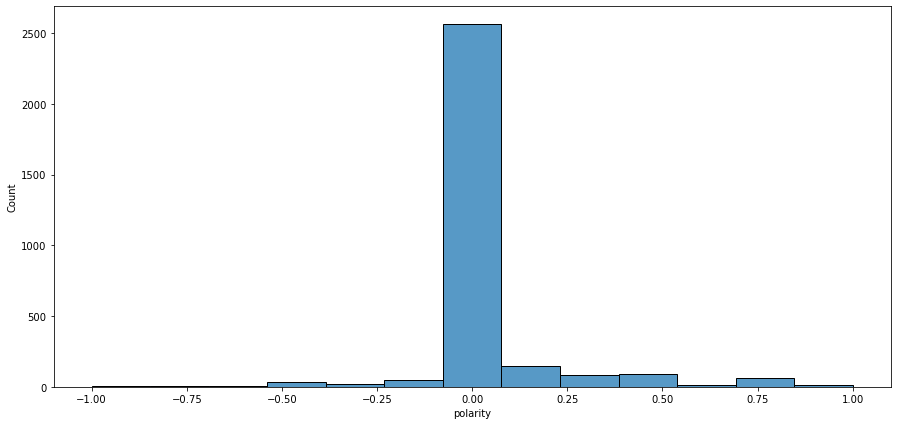

In [370]:
fig = plt.figure(figsize=(15,7))
sns.histplot(Final_df['polarity'])
plt.show()

In [371]:
##### remove neutral values 
#Final_df = Final_df[Final_df.polarity != 0]

# Word Cloud

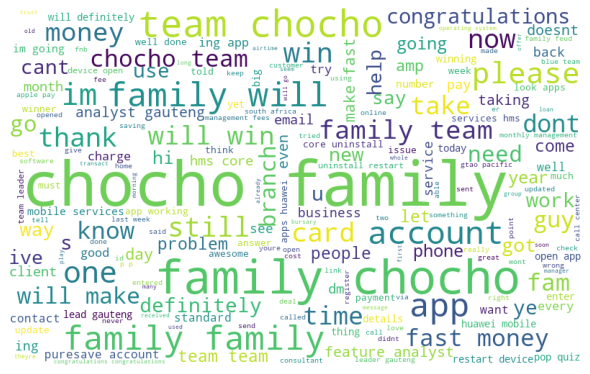

In [372]:
tweetString = " ".join(list(Final_df["cleaned_tweet"])).lower()
tweetString1 = re.sub(r"standardbankza|standard bank|bank","",tweetString)     #remove bank name

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [373]:
Hashtag_string = ""
for string_list in list(Final_df["hashtags"]):
    for word in string_list:
        Hashtag_string = Hashtag_string+" "+ word

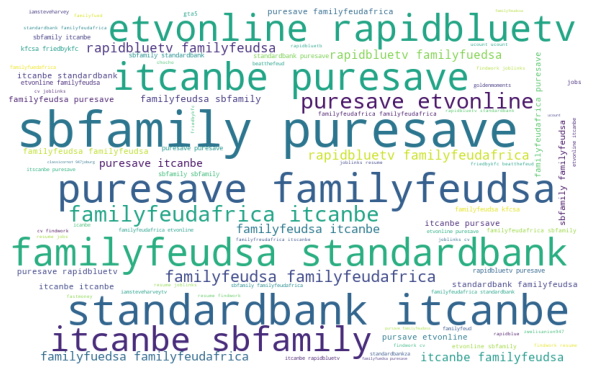

In [374]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(Hashtag_string)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

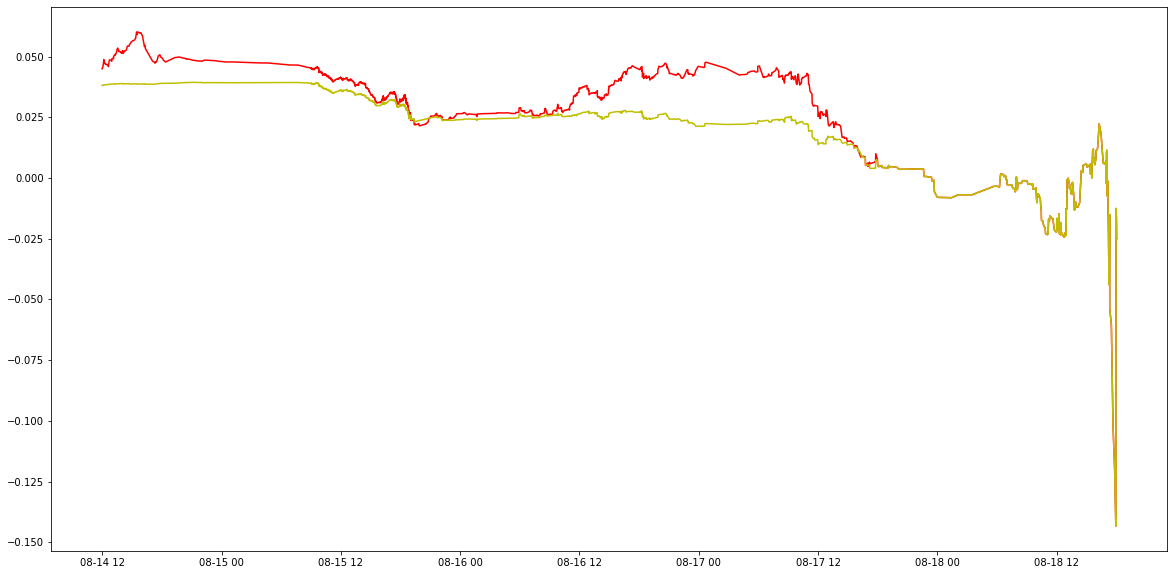

In [375]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(Final_df['date'],Final_df['rolling'], color ='r', label='Rolling Mean')
ax.plot(Final_df['date'],Final_df['mean'], color='y', label='Expanding Mean')
#z= plt.plot(Final_df['date'],Final_df["polarity"])

plt.show()

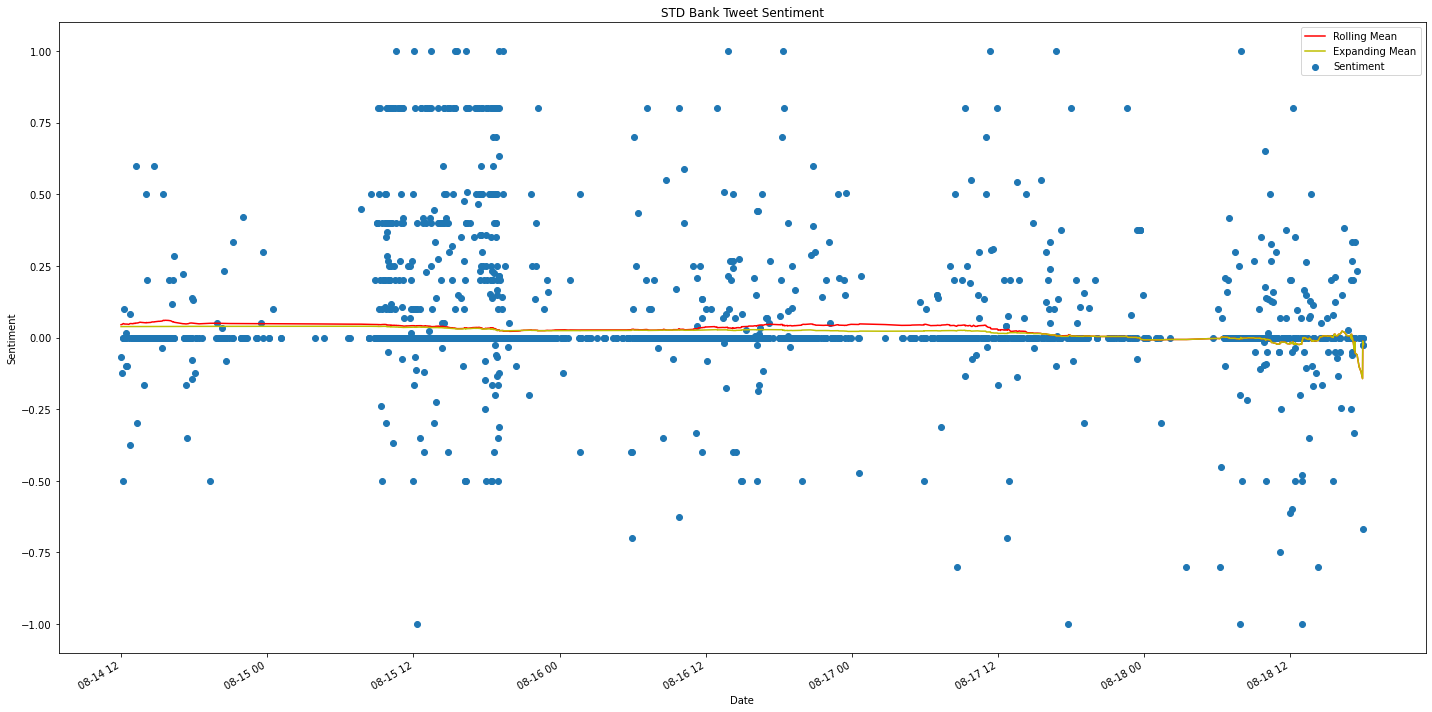

In [376]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

#plot data 
ax.scatter(Final_df['date'],Final_df['polarity'], label='Sentiment')
ax.plot(Final_df['date'],Final_df['rolling'], color ='r', label='Rolling Mean')
ax.plot(Final_df['date'],Final_df['mean'], color='y', label='Expanding Mean')
ax.set(title='STD Bank Tweet Sentiment', xlabel='Date', ylabel='Sentiment')

# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

ax.legend(loc='best')
fig.tight_layout()

plt.show()

In [377]:
Final_df.to_csv("NLP_Standardbank_July.csv")